<a href="https://colab.research.google.com/github/Deanelle/DataExplorationBigMart/blob/main/Big_Mart_Data_Cleaning_%26_Exploratory_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Big Mart Data Cleaning and Exploratory Analysis Project 

**Context**

About Big Mart 

Big Mart is a retail coporation and one of the fastest growing express home delivery food and retail store in India in 2016. 

**Aim of the Project**

To clean and then explore the data and create visualizations that will give insight into  the sales of each product at each particular outlet while also figuring out what factors play a key role in sales by answering these sets of questions based on observation:  


 **Questions** 

How does packaging impact the sales of a product at a store? 

*   How does the location of product in a store impact sales? 
*   How do demographics affect prodcut sales at a store? 
*   How does store size impact product sales at a store? 
*   Hows does item type impact the sales of a product at a store? 
*   How does the price of the prodcut impact its sales? 




**About the Dataset**

The dataset has 8524 records with 12 columns. The details of each column are below: 

Variable Description: 

1. ItemIdentifier--Unique product ID
2. ItemWeight--Weight of product
3. ItemFatContent--Whether the product is low fat or not
4. ItemVisibility -- The % of the total display area of all products in a  store allocated to the particular product
5. ItemType --The category to which the product belongs
6. ItemMRP -- Maximum Retail Price (list price) of the product
7. OutletIdentifier --Unique store ID
8. OutletEstablishmentYear --The year in which the store was established
9. OutletSize -- The size of the store in terms of ground area covered
10. OutletLocationType --The type of city in which the store is located
11. OutletType -- Whether the outlet is just a grocery store or some sort of supermarket
12. ItemOutletSales -- sales of the product in t particular store. This is the outcome variable to be predicted.

1. Import your libraries and upload your dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")


#Read files:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

Prior to cleaning the data, I am going to learn more about my data by examining the columns and rows. 

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


This dataset already had the training and testing data split. I used the info() funciton to take a look at the datatypes in the training set. 




In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


We observe here the datatypes included in our data. In the training set, there are 8523 observations and 12 columns and from the test set there are 5681 observations and 11 columns. More on this later. 

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


After looking at my training data, I see that Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Size,Outlet_Identifier,Outlet_Location_Type, and Outlet_Type are all categorical variables.This is important to note for any feature engineering that will happen prior to running machine learning models. 

Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales are continous variables. 

From the output, we also notice that there are a few NaN values in the dataset in Outlet_Size. 

However, we are going to look at the summary of the data by using the .isnull().sum() function to check for null values. Before that, I am also going to look at the test data. 

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


After getting the output, we see that there are NaN variables in Outlet_Size and in Item_Weight. 

We also notice that this data does not include the variable, Item_Outlet_Sales. This is the target variable that the data will be predicting. It is also a continous variable,so we know that we will be working on a regression probelm. 


In [6]:
print('train:',train.shape)
print('test:',test.shape)

train: (8523, 12)
test: (5681, 11)


We can see here that there is one less variabe in the test set. There are 12 columns in the training set and 11 in the test set. The test set does not have the targe variable (Item_Outlet_Sales(y) in it. 

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the output you can see that the maximum output sales, the target variable, is 13086 and the minimum is 33. 

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in Item_Weight and Outlet_Size that we will have to handle.Also, from looking at the tables before, item visbility had a few 0's which made no sense because in a store it is impossible for a product to have 0 visbility. These 0s will be treated like nulls as well. 

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The same null values appear here too. 

In [10]:
#combining the test and training set data 
train['source']='train'
test['source']='test'
mart=pd.concat([train,test],ignore_index=True)

I combined the trianing and test datasets to make it easier to work with when cleaning and running my analysis. 

In [11]:
#looking at combined dataset
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


Looks the same as the previous table above, excpet for the source column telling us where this data came from. 

I'm also going to look at the tail end of the data too. 

In [12]:
mart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


As we observed,there are nan values in the outlet-size that we will clean. 

In [13]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

This function gives us the total amount of null values in the combined dataset that we will handle while cleaning it. 
 

**Data Cleaning**

In [14]:
#removing the null values from all the columns

mart['Item_Weight']=mart['Item_Weight'].fillna(mart['Item_Weight'].mean)

mart['Outlet_Size']=mart['Outlet_Size'].fillna('Medium')

In [15]:
mart['Item_Visibility']=mart['Item_Visibility'].fillna(mart['Item_Visibility'].mean)

**Univariate Analysis**

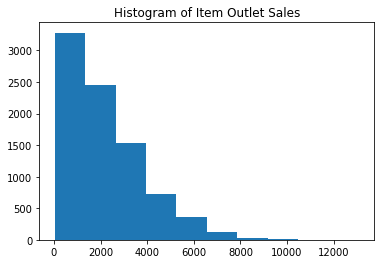

In [16]:
plt.hist(mart["Item_Outlet_Sales"])
plt.title("Histogram of Item Outlet Sales")
plt.show()

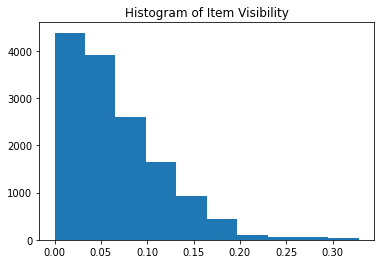

In [17]:
plt.hist(mart["Item_Visibility"])
plt.title("Histogram of Item Visibility")
plt.show()

Item_ Visibility is also right skewed. 




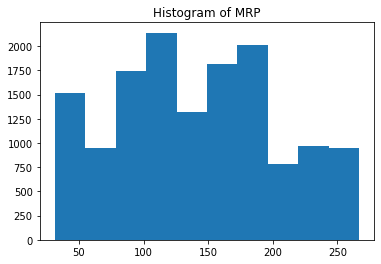

In [18]:
plt.hist(mart["Item_MRP"])
plt.title("Histogram of MRP")
plt.show()

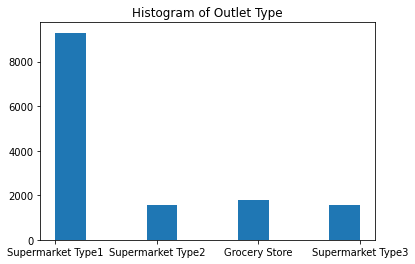

In [19]:
plt.hist(mart["Outlet_Type"])
plt.title("Histogram of Outlet Type")
plt.show()

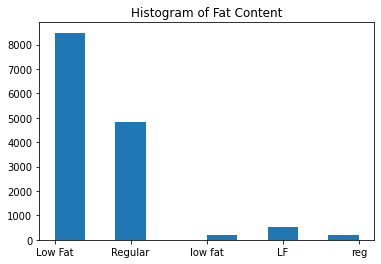

In [20]:
plt.hist(mart["Item_Fat_Content"])
plt.title("Histogram of Fat Content")
plt.show()

We see here that for Fat_Content, there are two options: Low Fat and Regular. However there are a lot more of the same thing on the graph. I'm going to correct this while Feature Engineering. 

**Bivariate Analysis** Now to look at the impact of our features on our target variable. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

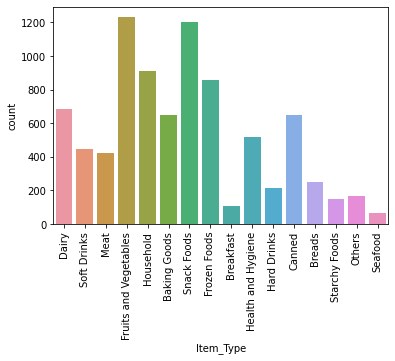

In [21]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

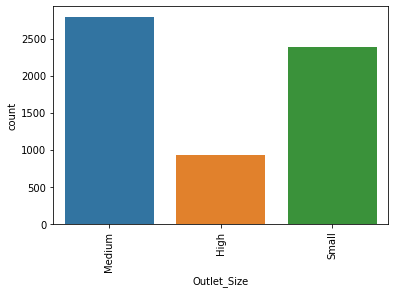

In [22]:
sns.countplot(train.Outlet_Size)
plt.xticks(rotation=90)

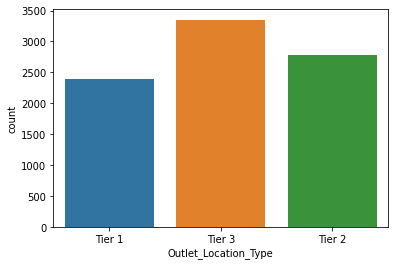

In [23]:
sns.countplot(train.Outlet_Location_Type)

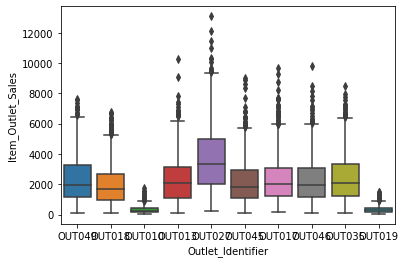

In [24]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=mart)

It appears that the higher the MRP, the more sales the product has. 

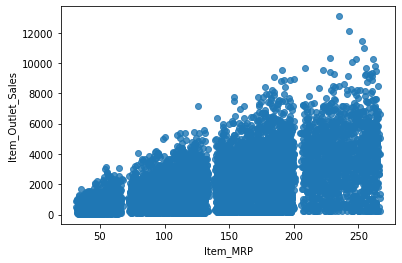

In [25]:
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales',data=mart)

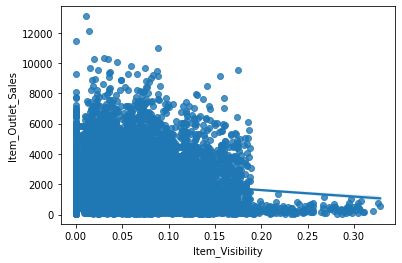

In [26]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=mart)

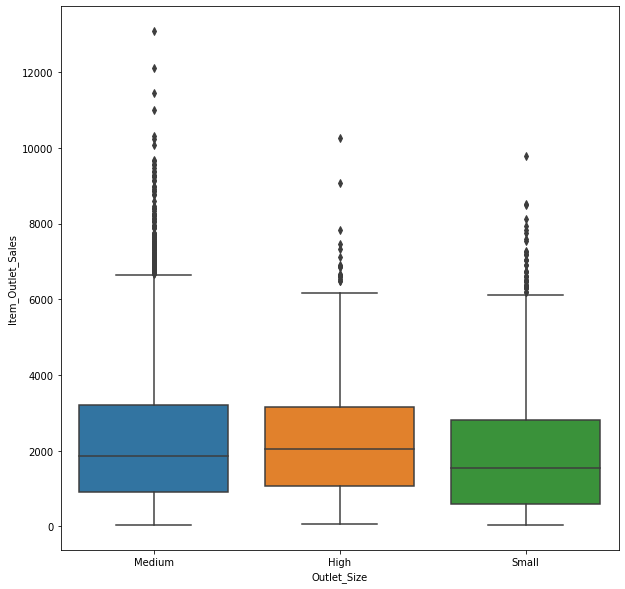

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=mart)

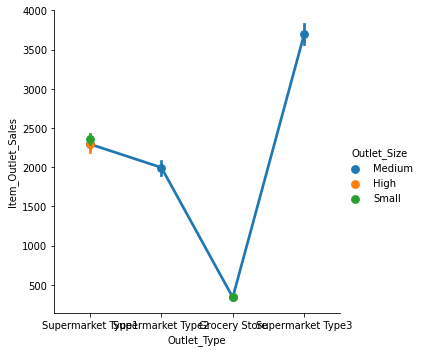

In [28]:
sns.factorplot(x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size',data=mart)

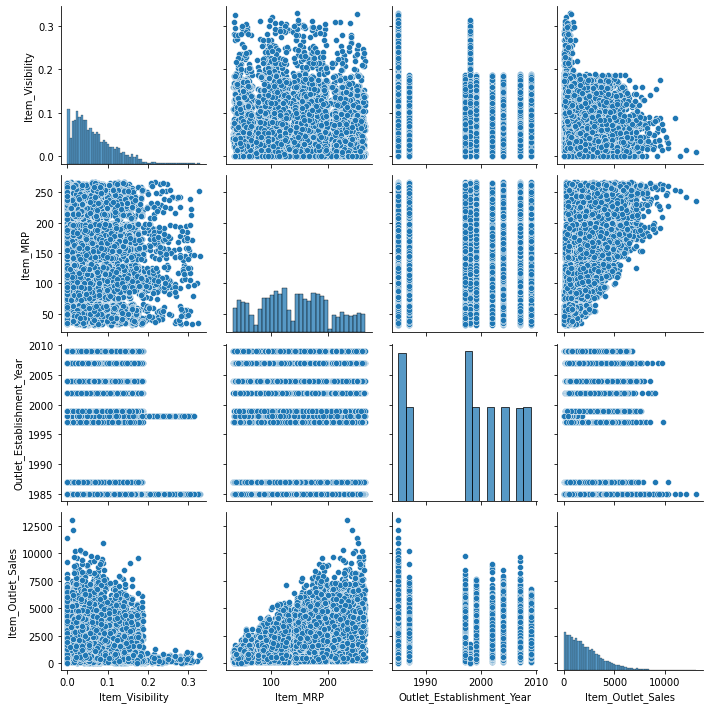

In [29]:
sns.pairplot(mart)

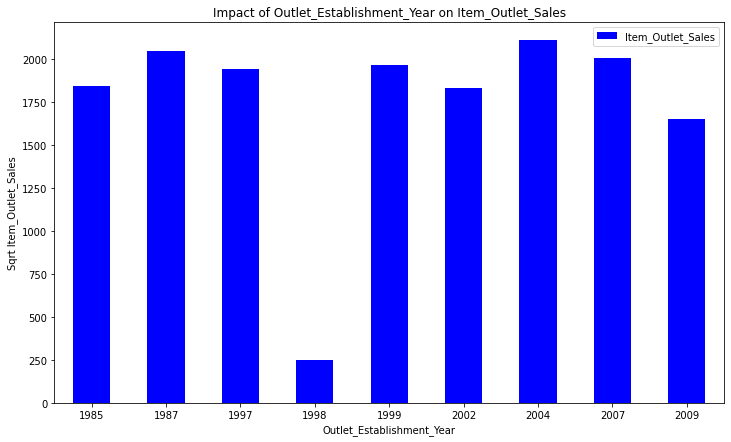

In [30]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no relationship between Out_Establishment_Year and Sales. 

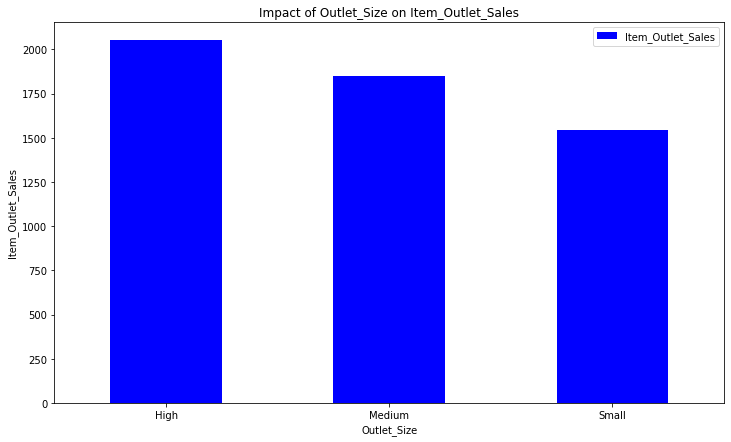

In [31]:
Item_Fat_Content_pivot=\
mart.pivot_table(index="Outlet_Size",values="Item_Outlet_Sales",aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

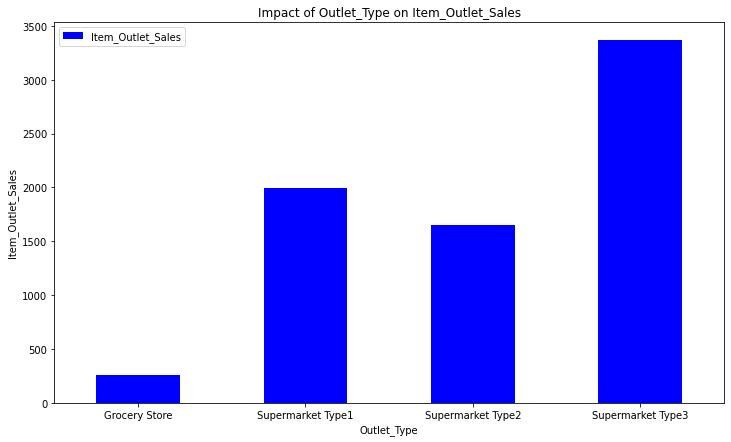

In [32]:
Item_Fat_Content_pivot=\
mart.pivot_table(index="Outlet_Type",values="Item_Outlet_Sales",aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

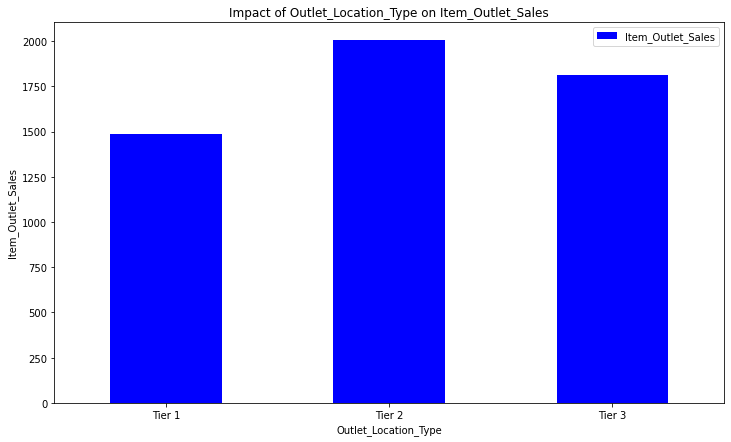

In [33]:
Item_Fat_Content_pivot=\
mart.pivot_table(index="Outlet_Location_Type",values="Item_Outlet_Sales",aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

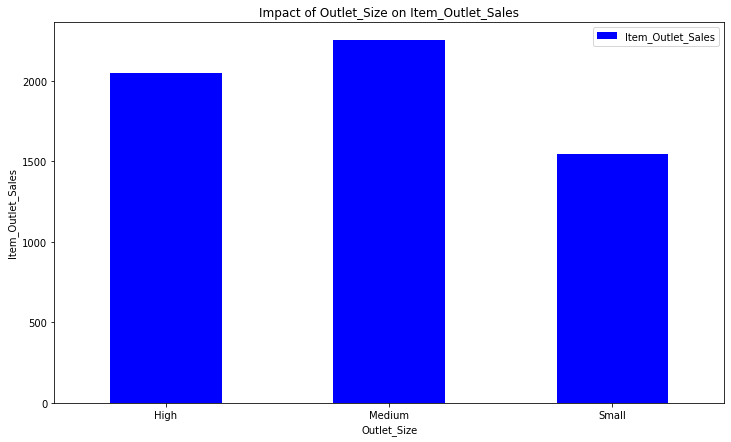

In [34]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [35]:
# Get correlation matrix
mart.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


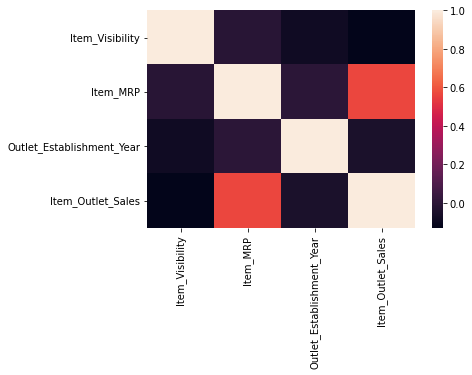

In [36]:
sns.heatmap(mart.corr())

From looking at the correlation matrix and how each variable impacts Item_Outlet_Sales, you can see that Item_Visibility has the lowest correlation and Item_MRP has the highest correlation to Item_Outlet_Sales. 

**Feature Engineering**

In [52]:

mart['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)



In [53]:
mart["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [55]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [56]:
# handling catagorical variables
mart= pd.get_dummies(mart, columns = col, drop_first = True)

In [57]:
mart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.3,0.016047,249.8092,OUT049,1999,3735.1380,train,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.5,0.016760,141.6180,OUT049,1999,2097.2700,train,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.2,0.000000,182.0950,OUT010,1998,732.3800,train,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,train,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.5,0.013496,141.3154,OUT046,1997,NaN,test,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
14200,FDD47,7.6,0.142991,169.1448,OUT018,2009,NaN,test,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
14201,NCO17,10,0.073529,118.7440,OUT045,2002,NaN,test,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
14202,FDJ26,15.3,0.000000,214.6218,OUT017,2007,NaN,test,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [85]:
feat_cols = [ 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

Assiging the x and y variables 

In [86]:
x=mart[feat_cols]
y=mart['Item_Outlet_Sales']

The Data after feature engineering. 

In [88]:
x.head()

,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.019278,48.2692,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,0.016760,141.6180,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0.000000,182.0950,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.000000,53.8614,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [89]:
x.tail()

,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
14199,0.013496,141.3154,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
14200,0.142991,169.1448,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
14201,0.073529,118.7440,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
14202,0.000000,214.6218,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
14203,0.104720,79.7960,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


Splitting the training and test dataset before running the algorithms. 

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Next steps: 

- The next thing I would do if I were to make predictions from the data is to fit the models that I will choose to run and then run them.After running the models,I will then evaluate with metrics like r2 or mean squared error, mean aboslute error or root mean sqaured error.